<a href="https://colab.research.google.com/github/RajaATAli/Purdue_BoilerMakeXI_Project/blob/main/GoogelCollab_RandomForest_HyperParameterTuned_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Random Forest Ensemble to Predict Diabetes
- Titled "diabetes_prediction_dataset.csv"
- 100,000 entries

In [1]:
!git clone https://github.com/RajaATAli/Purdue_BoilerMakeXI_Project.git

fatal: destination path 'Purdue_BoilerMakeXI_Project' already exists and is not an empty directory.


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
data_filepath = '/content/Purdue_BoilerMakeXI_Project/data/external/diabetes_prediction_dataset.csv'
Kaggle_Diabetes_Data = pd.read_csv(data_filepath)

## Data Preprocessing

**Summary of Dataset**

In [3]:
print("This is the Data distribution of all variables in the dataset")
print(Kaggle_Diabetes_Data.describe()) # Data distribution of variables
print("\nThese are the number of columns in the dataset")
print(Kaggle_Diabetes_Data.columns)
print("\nThese are the number of people with and without diabetes")
print(Kaggle_Diabetes_Data['diabetes'].value_counts())

This is the Data distribution of all variables in the dataset
                 age  hypertension  heart_disease            bmi  \
count  100000.000000  100000.00000  100000.000000  100000.000000   
mean       41.885856       0.07485       0.039420      27.320767   
std        22.516840       0.26315       0.194593       6.636783   
min         0.080000       0.00000       0.000000      10.010000   
25%        24.000000       0.00000       0.000000      23.630000   
50%        43.000000       0.00000       0.000000      27.320000   
75%        60.000000       0.00000       0.000000      29.580000   
max        80.000000       1.00000       1.000000      95.690000   

         HbA1c_level  blood_glucose_level       diabetes  
count  100000.000000        100000.000000  100000.000000  
mean        5.527507           138.058060       0.085000  
std         1.070672            40.708136       0.278883  
min         3.500000            80.000000       0.000000  
25%         4.800000          

**Data distribution of both numerical and categorical columns**

In [4]:
# Data distribution of categorical columns
categorical_columns = Kaggle_Diabetes_Data.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"This is the data distribution of categorical column `{col}`:")
    print(Kaggle_Diabetes_Data[col].value_counts())
    print("-"*50)


This is the data distribution of categorical column `gender`:
Female    58552
Male      41430
Other        18
Name: gender, dtype: int64
--------------------------------------------------
This is the data distribution of categorical column `smoking_history`:
No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: smoking_history, dtype: int64
--------------------------------------------------


In [5]:
# Checking for missing values
print("Missing values in Dataset")
Kaggle_Diabetes_Data.isnull().sum()

Missing values in Dataset


gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

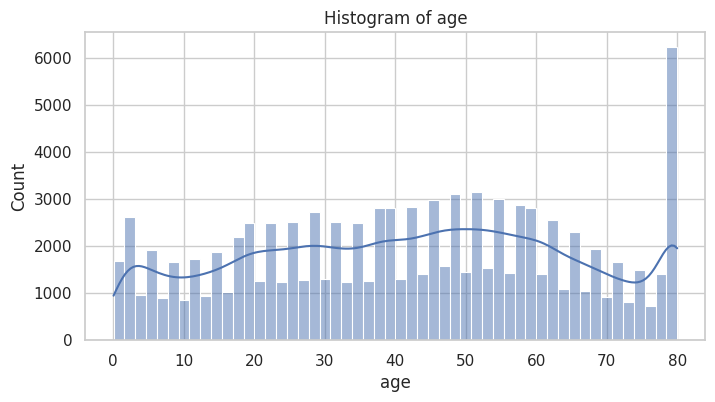

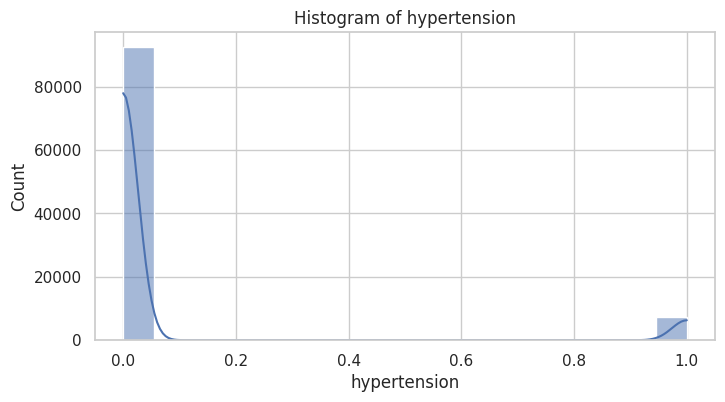

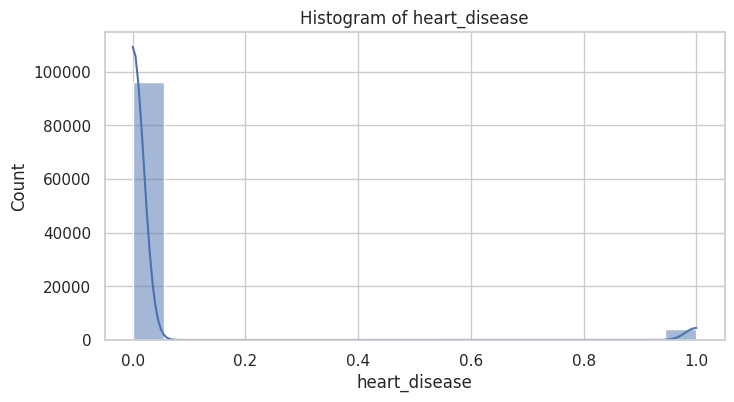

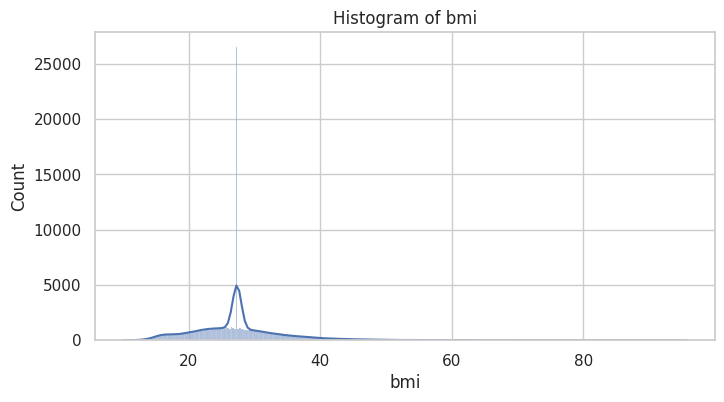

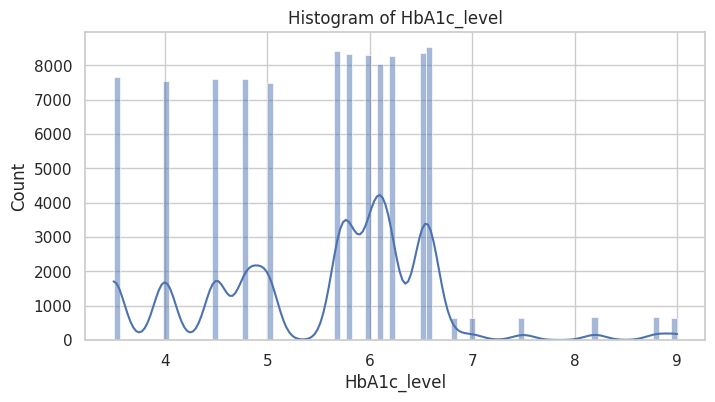

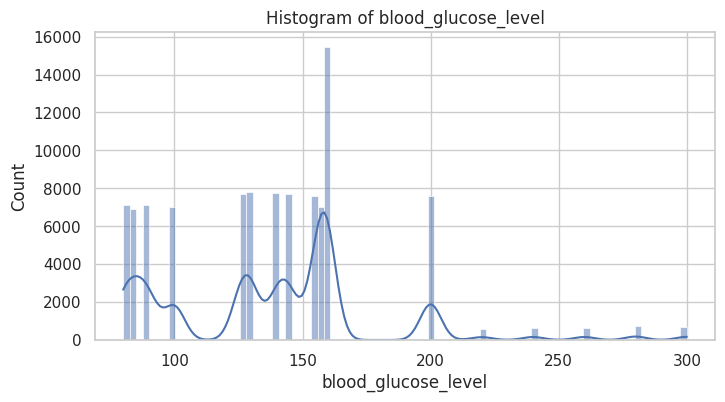

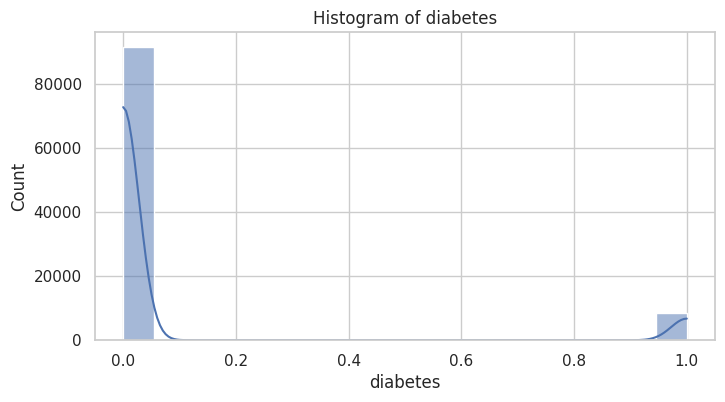

In [6]:
# Histograms for Numerical Variables (individually)
sns.set(style="whitegrid")
numerical_columns = Kaggle_Diabetes_Data.select_dtypes(include=['number']).columns

for col in numerical_columns:
    plt.figure(figsize=(8,4))
    sns.histplot(Kaggle_Diabetes_Data[col], kde='True')
    plt.title(f"Histogram of {col}")
plt.show()

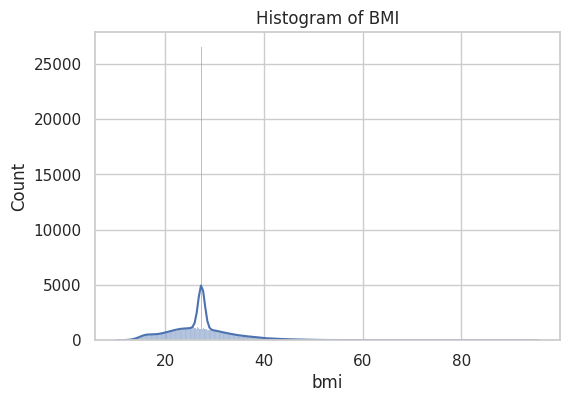

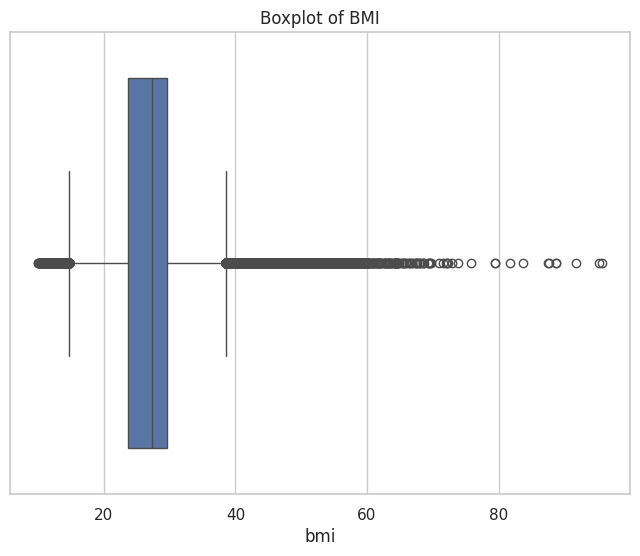

This is the lower bound being used for outlier detection: 14.705
This is the upper bound being used for outlier detection: 38.504999999999995
Number of Outliers Detected in BMI: 7086


In [7]:
# Visualizing BMI Distributions as max value of 95.69 suggest the presence of outliers or extreme values
plt.figure(figsize=(6, 4))
sns.histplot(Kaggle_Diabetes_Data['bmi'], kde=True)
plt.title("Histogram of BMI")
plt.show()

# Box Plot
plt.figure(figsize=(8, 6))
sns.boxplot(x=Kaggle_Diabetes_Data['bmi'])
plt.title("Boxplot of BMI")
plt.show()

# Calculating Inter Quartile Range for Outlier Detection
Q1 = Kaggle_Diabetes_Data['bmi'].quantile(0.25)
Q3 = Kaggle_Diabetes_Data['bmi'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print("This is the lower bound being used for outlier detection:", lower_bound)
print("This is the upper bound being used for outlier detection:", upper_bound)

outliers = Kaggle_Diabetes_Data[(Kaggle_Diabetes_Data['bmi'] < lower_bound) | (Kaggle_Diabetes_Data['bmi'] > upper_bound)]
print("Number of Outliers Detected in BMI:", outliers.shape[0])

In [8]:
# Handling the outliers
# Dropping participants with BMI outside the lower and upper bounds
Kaggle_Diabetes_Data = Kaggle_Diabetes_Data[(Kaggle_Diabetes_Data['bmi'] >= lower_bound) & (Kaggle_Diabetes_Data['bmi'] <= upper_bound)]

# Print the shape of the dataset to confirm the number of rows after removal
print("Number of entries after removing BMI outliers:", Kaggle_Diabetes_Data.shape[0])

# Rechecking Data Distribution of BMI
print(Kaggle_Diabetes_Data.describe())
print("\nThese are the number of people with and without diabetes")
print(Kaggle_Diabetes_Data['diabetes'].value_counts())

Number of entries after removing BMI outliers: 92914
                age  hypertension  heart_disease           bmi   HbA1c_level  \
count  92914.000000   92914.00000   92914.000000  92914.000000  92914.000000   
mean      41.966506       0.07028       0.039068     26.400779      5.514219   
std       22.628538       0.25562       0.193759      4.892598      1.061857   
min        0.080000       0.00000       0.000000     14.710000      3.500000   
25%       24.000000       0.00000       0.000000     23.480000      4.800000   
50%       43.000000       0.00000       0.000000     27.320000      5.800000   
75%       60.000000       0.00000       0.000000     28.440000      6.200000   
max       80.000000       1.00000       1.000000     38.500000      9.000000   

       blood_glucose_level      diabetes  
count         92914.000000  92914.000000  
mean            137.495426      0.075575  
std              40.080111      0.264319  
min              80.000000      0.000000  
25%        

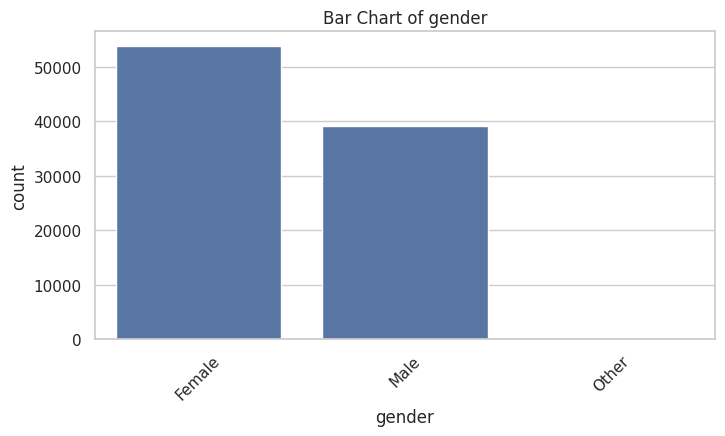

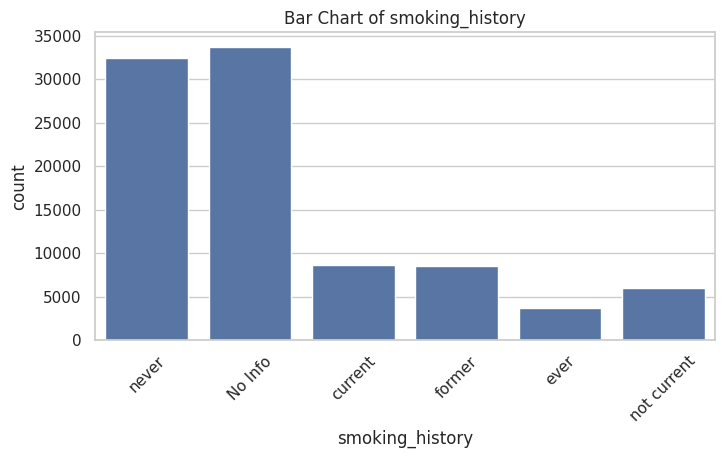

In [9]:
# Bar charts of Categorical columns
sns.set(style="whitegrid")
for col in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=col, data=Kaggle_Diabetes_Data)
    plt.title(f"Bar Chart of {col}")
    plt.xticks(rotation=45)  # Rotates the labels on the x-axis for better readability
    plt.show()

- Not Current = Refers to individuals who used to smoke but are currently not smoking
- Former = Individuals who used to smoke but are currently not smoking AND have been abstinent for a longer period of time than those in the "not current" category.
- Current = Indicates that the individual is currently a smoker at the time of data collection. It means that the person is actively smoking or has reported smoking recently.
- Ever = Represents individuals who have ever smoked in their lifetime, regardless of their current smoking status (e.g. Current and Former). It includes individuals who are currently smoking ("Current"), as well as those who have previously smoked but may have quit at the time of data collection ("Former").

**Ordering them from least to most harmful for diabetes**
1. Never
2. Not Current
3. Former
4. Current
5. Ever (dropping this column for less confusing analysis)

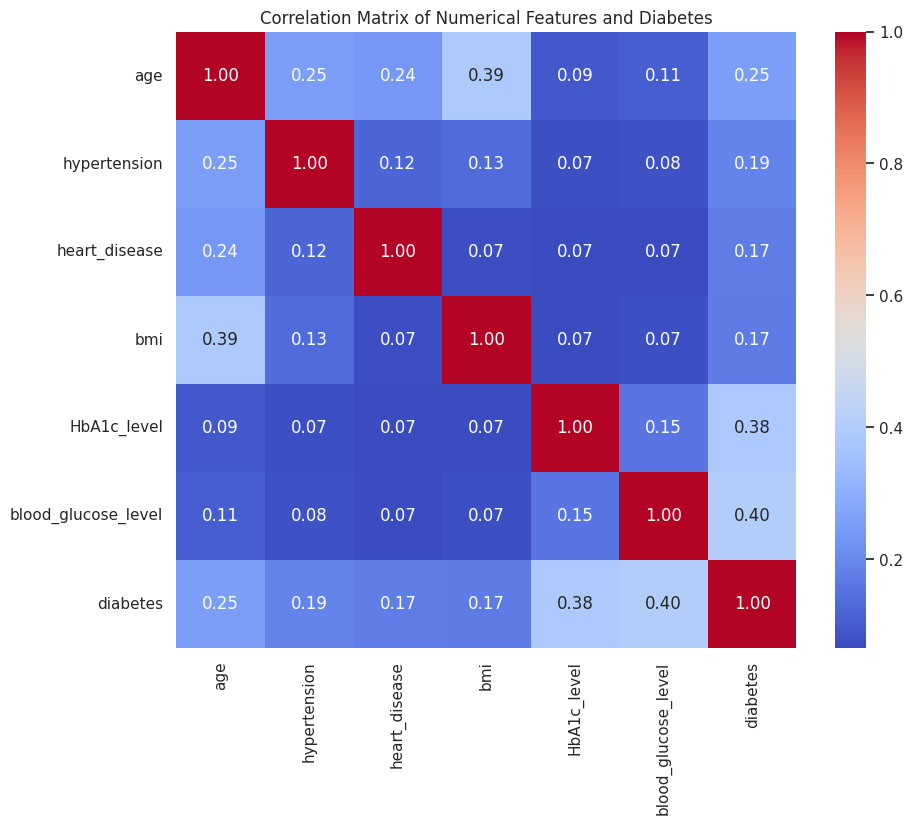

In [10]:
# Correlation Matrix (features (only numerical) and target variable (diabetes))
corr_matrix = Kaggle_Diabetes_Data[numerical_columns].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features and Diabetes')
plt.show()

**One-Hot Encoding Categorical Variables**
- No numerical relationship between categories so we just use One-Hot Encoding

In [11]:
# Dropping all participants with the "Ever" Category for less confusing analysis
Kaggle_Diabetes_Data = Kaggle_Diabetes_Data[Kaggle_Diabetes_Data['smoking_history'] != 'ever']
print(Kaggle_Diabetes_Data['smoking_history'].value_counts())

No Info        33726
never          32393
current         8624
former          8506
not current     5988
Name: smoking_history, dtype: int64


In [12]:
# Applying One-Hot Encoding to categorical variables
Kaggle_Diabetes_Data_encoded = pd.get_dummies(Kaggle_Diabetes_Data, columns=['gender', 'smoking_history']) # Don't use drop_first = True for non-linear models
print(Kaggle_Diabetes_Data_encoded.head())
export_filepath = "/content/Purdue_BoilerMakeXI_Project/data/processed/cleaned_diabetes_one_hot_encoding_BMI_Outliers.csv"
Kaggle_Diabetes_Data_encoded.to_csv(export_filepath, index=False)

    age  hypertension  heart_disease    bmi  HbA1c_level  blood_glucose_level  \
0  80.0             0              1  25.19          6.6                  140   
1  54.0             0              0  27.32          6.6                   80   
2  28.0             0              0  27.32          5.7                  158   
3  36.0             0              0  23.45          5.0                  155   
4  76.0             1              1  20.14          4.8                  155   

   diabetes  gender_Female  gender_Male  gender_Other  \
0         0              1            0             0   
1         0              1            0             0   
2         0              0            1             0   
3         0              1            0             0   
4         0              0            1             0   

   smoking_history_No Info  smoking_history_current  smoking_history_former  \
0                        0                        0                       0   
1           

**Model Building (Initial)**

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score

# Seperating Features (X) AND target Variable (Y)
X = Kaggle_Diabetes_Data_encoded.drop('diabetes', axis=1)
Y = Kaggle_Diabetes_Data_encoded['diabetes']

# Splitting the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [14]:
# Training the Initial Random Forest Model
rf_model = RandomForestClassifier(
    random_state=42,
    n_estimators=100
)
rf_model.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

In [15]:
# Predictiing and Evaluating the Model
Y_pred = rf_model.predict(X_test)
print("Accuracy:", accuracy_score(Y_test, Y_pred))
print("ROC AUC:", roc_auc_score(Y_test, Y_pred))
print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_pred))
print("Classification Report:\n", classification_report(Y_test, Y_pred))

Accuracy: 0.9722658000896459
ROC AUC: 0.8297333802816584
Confusion Matrix:
 [[16464    41]
 [  454   889]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99     16505
           1       0.96      0.66      0.78      1343

    accuracy                           0.97     17848
   macro avg       0.96      0.83      0.88     17848
weighted avg       0.97      0.97      0.97     17848



**Feature Engineering before Balancing the Dataset**

In [17]:
# Adding interaction terms
# We add these interaction terms to capture the combined effects of these variables
# For example, the risk of diabetes might be higher in individuals who have both high BMI and are older.
Kaggle_Diabetes_Data['age_bmi_interaction'] = Kaggle_Diabetes_Data['age'] * Kaggle_Diabetes_Data['bmi']
Kaggle_Diabetes_Data['hypertension_heart_interaction'] = Kaggle_Diabetes_Data['hypertension'] * Kaggle_Diabetes_Data['heart_disease']

# Applying Transformations
Kaggle_Diabetes_Data['log_bmi'] = np.log(Kaggle_Diabetes_Data['bmi'] + 1) # Adding 1 to avoid log(0)
Kaggle_Diabetes_Data['sqrt_age'] = np.sqrt(Kaggle_Diabetes_Data['age'])

# Re-apply one-hot encoding to include the new features
Kaggle_Diabetes_Data_encoded = pd.get_dummies(Kaggle_Diabetes_Data, columns=['gender', 'smoking_history'])

# Exporting the updated dataset with feature engineering
export_filepath = "/content/Purdue_BoilerMakeXI_Project/data/processed/cleaned_diabetes_with_feature_engineering.csv"
Kaggle_Diabetes_Data_encoded.to_csv(export_filepath, index=False)

# Update the features (X) and target (Y) for model building
X = Kaggle_Diabetes_Data_encoded.drop('diabetes', axis=1)
Y = Kaggle_Diabetes_Data_encoded['diabetes']

# Splitting the data into training and testing sets (same as before)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Training the updated Random Forest Model
rf_model.fit(X_train, Y_train)

# Predicting and Evaluating the updated model
Y_pred = rf_model.predict(X_test)
print("Updated Model Accuracy:", accuracy_score(Y_test, Y_pred))
print("Updated Model ROC AUC:", roc_auc_score(Y_test, Y_pred))
print("Updated Model Confusion Matrix:\n", confusion_matrix(Y_test, Y_pred))
print("Updated Model Classification Report:\n", classification_report(Y_test, Y_pred))

Updated Model Accuracy: 0.9717055132227701
Updated Model ROC AUC: 0.8287464278407478
Updated Model Confusion Matrix:
 [[16456    49]
 [  456   887]]
Updated Model Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98     16505
           1       0.95      0.66      0.78      1343

    accuracy                           0.97     17848
   macro avg       0.96      0.83      0.88     17848
weighted avg       0.97      0.97      0.97     17848



**Balancing the Dataset**

In [18]:
!pip install -U imbalanced-learn

In [19]:
from imblearn.over_sampling import SMOTE

# Applying SMOTE for balancing the dataset
smote = SMOTE(random_state=42)
X_train_resampled, Y_train_resampled = smote.fit_resample(X_train, Y_train)

# Re-training the Model with Balanced Data
rf_model.fit(X_train_resampled, Y_train_resampled)

# Re-evaluating the Model
Y_pred_resampled = rf_model.predict(X_test)
print("Model Accuracy after Balancing:", accuracy_score(Y_test, Y_pred_resampled))
print("Model ROC AUC after Balancing:", roc_auc_score(Y_test, Y_pred_resampled))
cm = confusion_matrix(Y_test, Y_pred_resampled)
print("Confusion Matrix after Balancing:\n", cm)
report = classification_report(Y_test, Y_pred_resampled)
print("Classification Report after Balancing:\n", report)


Model Accuracy after Balancing: 0.9685118780815778
Model ROC AUC after Balancing: 0.8362538665261525
Confusion Matrix after Balancing:
 [[16372   133]
 [  429   914]]
Classification Report after Balancing:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98     16505
           1       0.87      0.68      0.76      1343

    accuracy                           0.97     17848
   macro avg       0.92      0.84      0.87     17848
weighted avg       0.97      0.97      0.97     17848



**Hyperparameter Tuning**

In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define a more targeted range of hyperparameters
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 15, 20, None],
    'min_samples_split': [2, 4],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt']
}

# Configure GridSearchCV
grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=3,
    scoring='roc_auc',
    n_jobs=-1
)

# Perform the grid search
grid_search.fit(X_train_resampled, Y_train_resampled)

# Extracting and printing the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Parameters:", best_params)
print("Best ROC AUC Score:", best_score)


Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}
Best ROC AUC Score: 0.9977448392051924


**Retraining Model with best Parameters**

In [25]:
best_rf_model = RandomForestClassifier(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    max_features=best_params['max_features'],
    random_state=42
)
best_rf_model.fit(X_train_resampled, Y_train_resampled)

RandomForestClassifier(min_samples_leaf=2, n_estimators=300, random_state=42)

In [26]:
Y_pred = best_rf_model.predict(X_test)
print("Accuracy:", accuracy_score(Y_test, Y_pred))
print("ROC AUC:", roc_auc_score(Y_test, Y_pred))
print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_pred))
print("Classification Report:\n", classification_report(Y_test, Y_pred))

Accuracy: 0.9698565665620797
ROC AUC: 0.8342448631848062
Confusion Matrix:
 [[16404   101]
 [  437   906]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98     16505
           1       0.90      0.67      0.77      1343

    accuracy                           0.97     17848
   macro avg       0.94      0.83      0.88     17848
weighted avg       0.97      0.97      0.97     17848

